In [2]:
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.ATLAS)  # ATLAS/CMS/ALICE plot style
import numpy as np
import pandas as pd
import scipy.optimize as sc

In [23]:
# import data
df = pd.read_csv('correlation.csv')

In [24]:
# define fit function

def correlation(theta, N, a2, a4):
    theta = theta * np.pi / 180
    return N * (1 + a2 * np.cos(theta)**2 + a4 * np.cos(theta)**4)

coeffs, cov = sc.curve_fit(correlation,
                           df['angle'], df['rate'],
                           sigma=df['error'], absolute_sigma=True)

print(coeffs)
print(np.sqrt(np.diagonal(cov)))

[ 0.29962754 -0.83631665  1.09035383]
[0.00783621 0.15530864 0.16399234]


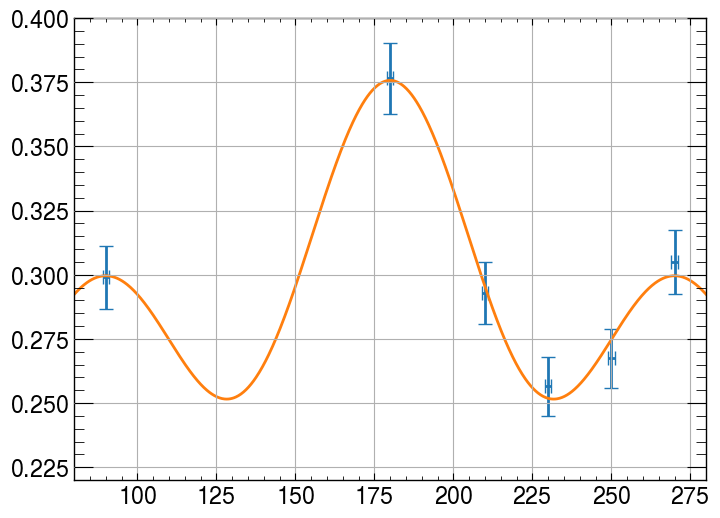

In [26]:
fig, ax = plt.subplots()

ax.errorbar(df['angle'], df['rate'],
            xerr=1, yerr=df['error'],
            fmt='none', capsize=5)

angles = np.linspace(80, 280, 1001)
ax.plot(angles, correlation(angles, *coeffs), c='C1', label='fit')

ax.set_xlim((80, 280))
ax.grid()

plt.show()